<a href="https://colab.research.google.com/github/deepu718/tensorflow_practice/blob/main/02_neural_network_multi_class_classifiction_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Working with a larger example (multiclass classifiction)

when you have more than two classes as an option, it's known as **multi-class classifcation**.
  * This means if you have 3 different classes, it's multi-class classifiction.
  * it also means if you have 100 differnet classes, its multi-class classification

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# show the first training example
print(f'Training sample:\n{train_data[0]}')
print(f'Training label:\n{train_labels[0]}')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

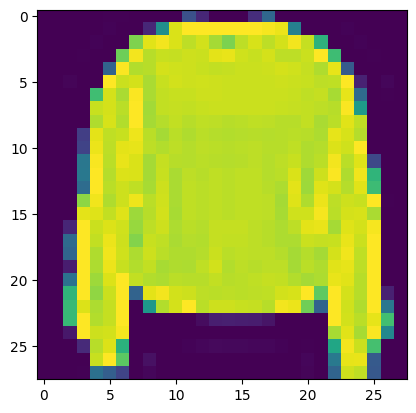

In [5]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [6]:
# Check out the samples label
train_labels[7]

2

In [7]:
# Create a small list so we can index onto our training labels so they are human readable
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

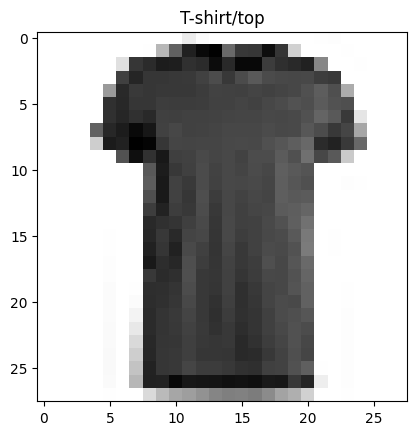

In [8]:
# plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

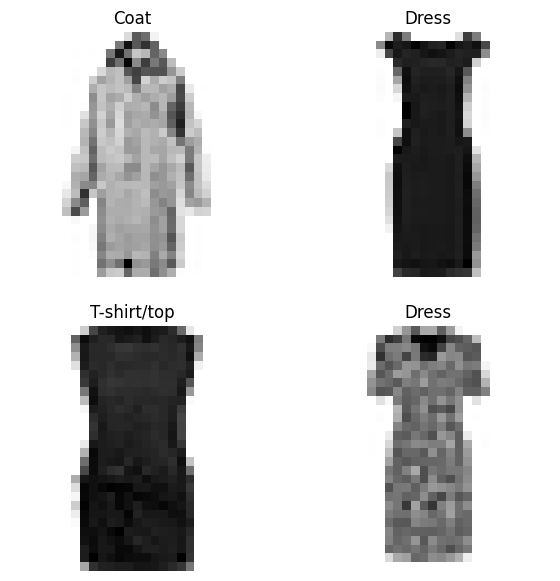

In [9]:
# plot multiple random images
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

for our multi-class classification model, we can use a similar architechture we can use a similar architechture to our binary classifiers, however we're going to have to tweak few things:
  * Input shape = 28 x 28(the shape of one image)
  * Output shape = 10(one per class of clothing)
  * Loss function = tf.keras.losses.CategoricalCrossentropy()
      * if your labels are one_hot encoded use CategoricalCrossentropy.
      * if your labels are integers use SparseCategoricalCrossentrpy
  * Output layer activation = Softmax

In [10]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
non_norm_history = model_1.fit(train_data,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.4938 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [11]:
# Check the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Check the min max values of the training data
train_data.min(),train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1

In [13]:
# we can get out training data and testing data between 0 & 1 by divdng by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [14]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
norm_history = model_2.fit(train_data_norm,
                               tf.one_hot(train_labels,depth=10),
                               epochs=10,
                               validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4473 - accuracy: 0.4405 - val_loss: 0.9800 - val_accuracy: 0.6766
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6951 - accuracy: 0.7595 - val_loss: 0.6485 - val_accuracy: 0.7785
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5817 - accuracy: 0.7975 - val_loss: 0.5994 - val_accuracy: 0.7933
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5479 - accuracy: 0.8112 - val_loss: 0.5703 - val_accuracy: 0.8050
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5308 - accuracy: 0.8163 - val_loss: 0.5636 - val_accuracy: 0.8067
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5186 - accuracy: 0.8202 - val_loss: 0.5629 - val_accuracy: 0.8079
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5098 - accuracy: 0.8229 - val_loss: 0.5552 - val_accuracy:

<Axes: title={'center': 'normalized data'}>

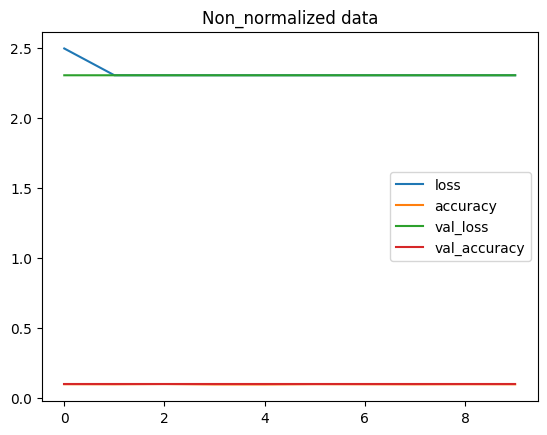

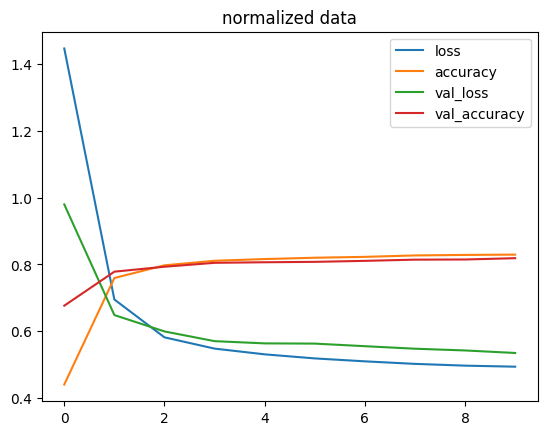

In [15]:
import pandas as pd
# plot the non norm data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non_normalized data")
pd.DataFrame(norm_history.history).plot(title="normalized data")


In [16]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# compile the model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Create the learing rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
# Fit the model
find_lr_history = model_3.fit(train_data_norm,
                               tf.one_hot(train_labels,depth=10),
                               epochs=40,
                               validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)),
                           callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0748 - accuracy: 0.6187 - val_loss: 0.7316 - val_accuracy: 0.7278 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6747 - accuracy: 0.7541 - val_loss: 0.6584 - val_accuracy: 0.7746 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5901 - accuracy: 0.7970 - val_loss: 0.6033 - val_accuracy: 0.7900 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5493 - accuracy: 0.8098 - val_loss: 0.5627 - val_accuracy: 0.8076 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5312 - accuracy: 0.8152 - val_loss: 0.5909 - val_accuracy: 0.7946 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5203 - accuracy: 0.8184 - val_loss: 0.5885 - val_accuracy: 0.8008 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

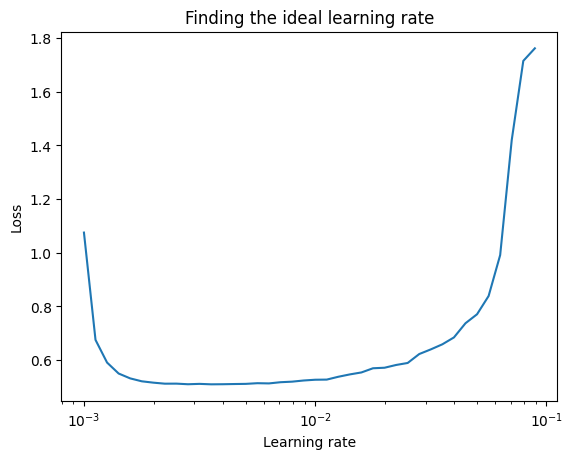

In [17]:
# PLot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [18]:
# Let's refit a model with the ideal learing rate

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# compile the model
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data_norm,
                               tf.one_hot(train_labels,depth=10),
                               epochs=20,
                               validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2079 - accuracy: 0.5841 - val_loss: 0.8594 - val_accuracy: 0.7353
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7608 - accuracy: 0.7603 - val_loss: 0.7438 - val_accuracy: 0.7618
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6683 - accuracy: 0.7753 - val_loss: 0.6787 - val_accuracy: 0.7721
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6222 - accuracy: 0.7861 - val_loss: 0.6446 - val_accuracy: 0.7788
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5951 - accuracy: 0.7930 - val_loss: 0.6281 - val_accuracy: 0.7861
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5761 - accuracy: 0.7983 - val_loss: 0.6126 - val_accuracy: 0.7834
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5624 - accuracy: 0.8034 - val_loss: 0.6109 - val_accuracy:

from tensorflow.python.util.dispatch import register_unary_elementwise_api
## Evaluating our multi class classification model

To evluate our multi class classification model we could:
* Evaluate its performance using other classification metrics.
* Asses some of the its predictions
* Improve its results
* Save and export it for later use

In [19]:
# Create aconfusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true,y_preds,classes=None,figsize = (10,10),text_size=15):
  # Create the confusion matrrix
  cm = confusion_matrix(y_true, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # create a matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  if classes:
    labels=classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion matrix",
        xlabel="Predicted Label",
        ylabel="True label",
        xticks = np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
  # Set x-axis label to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)
  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size)

In [20]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [21]:
# Make some predictions with our model
y_probs = model_4.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[4.0014731e-07, 2.0375153e-09, 4.0001208e-08, 1.4895263e-06,
        1.7131905e-08, 2.4089357e-01, 5.0139555e-08, 2.2639959e-01,
        7.0068672e-02, 4.6263629e-01],
       [6.5434411e-05, 4.1737294e-06, 6.3911986e-01, 2.9990717e-04,
        2.9703841e-01, 2.4256427e-14, 6.1821803e-02, 1.2228696e-10,
        1.6505171e-03, 6.6655421e-14],
       [2.3618108e-07, 9.9973679e-01, 1.8501878e-05, 2.1347769e-05,
        4.5183548e-08, 7.5823250e-11, 2.2782756e-09, 2.2314237e-04,
        4.1204359e-10, 3.7485293e-11],
       [4.5610367e-08, 9.9970698e-01, 2.9930285e-07, 9.2086593e-05,
        6.7030523e-09, 1.2701755e-12, 5.8962779e-11, 2.0057667e-04,
        4.8350816e-11, 7.9189730e-09],
       [1.8940713e-01, 2.6419133e-05, 2.6545627e-02, 2.7879588e-02,
        4.0851291e-02, 2.9100039e-07, 6.9922310e-01, 6.7702223e-07,
        1.6061900e-02, 3.9712522e-06]], dtype=float32)

In [22]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [23]:
# convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 6, 6, 5, 7])

In [24]:
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[797,   4,  11,  59,   2,   3, 113,   0,  10,   1],
       [  3, 939,  10,  45,   0,   0,   3,   0,   0,   0],
       [ 25,   2, 659,  17, 162,   0, 130,   0,   5,   0],
       [ 47,  16,  10, 832,  34,   0,  56,   1,   4,   0],
       [  1,   0, 103,  47, 702,   0, 141,   0,   6,   0],
       [  3,   0,   0,   1,   0, 907,   0,  53,  10,  26],
       [170,   1,  84,  47, 116,   0, 568,   1,  13,   0],
       [  0,   0,   0,   0,   0,  38,   0, 942,   0,  20],
       [ 10,   1,   6,   8,  19,   9,  34,   5, 906,   2],
       [  0,   0,   0,   2,   0,  22,   1,  50,   0, 925]])

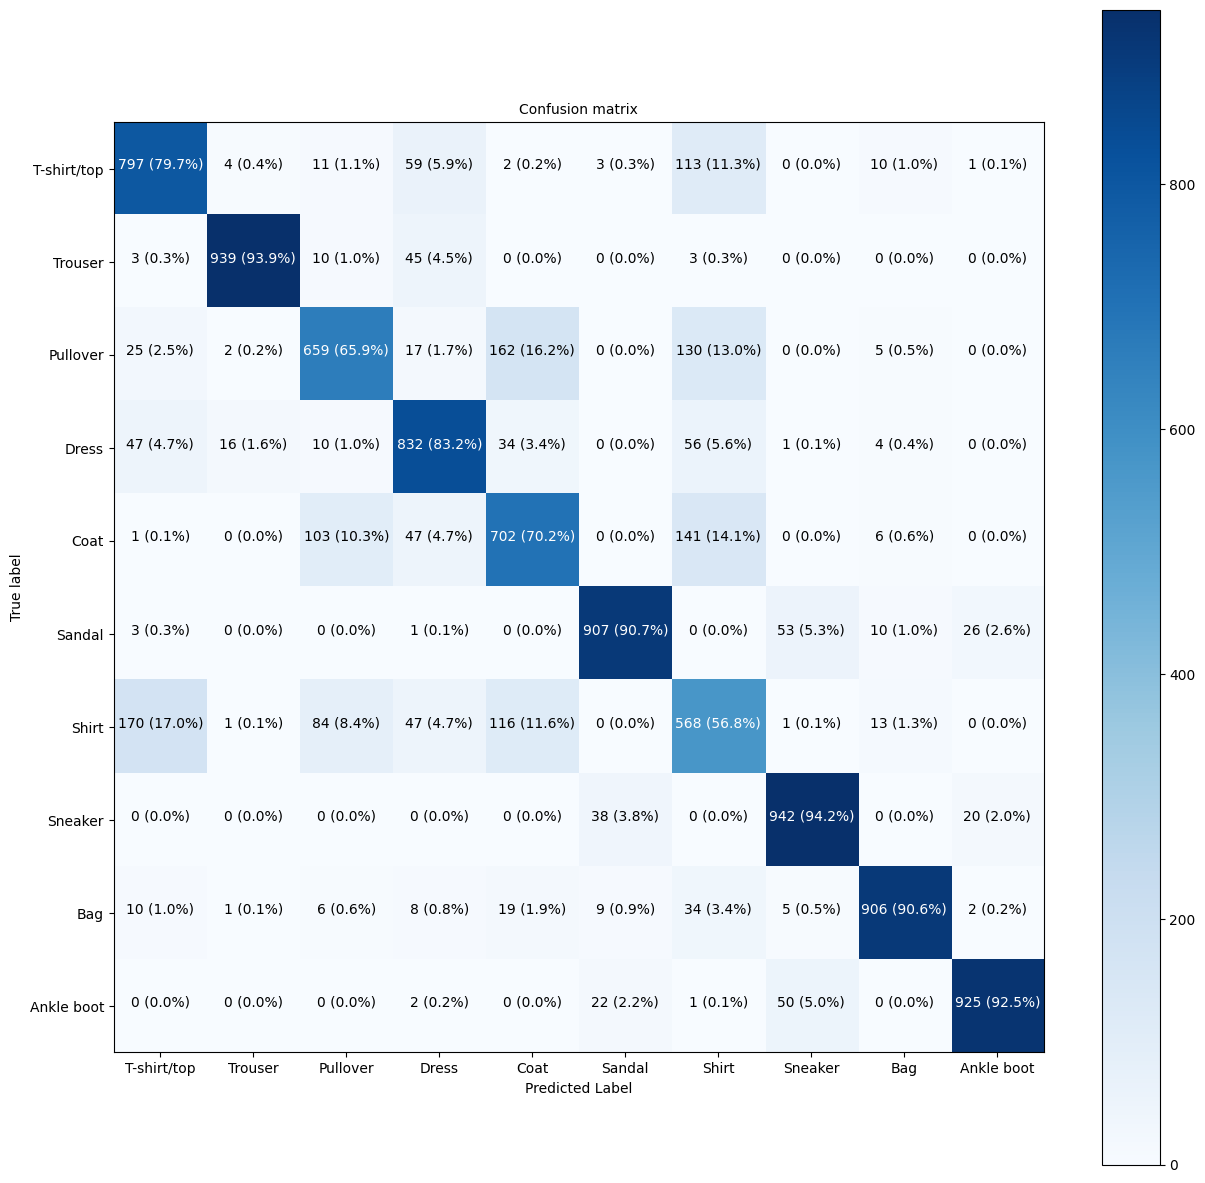

In [31]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_preds=y_preds,
                      classes=class_names,
                      figsize = (15,15),
                      text_size=10)

## How about we create a little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [32]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0,len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information
  plt.xlabel(f"pred : {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% (True: {true_label})",color=color)

1/1 [==============================] - 0s 36ms/step


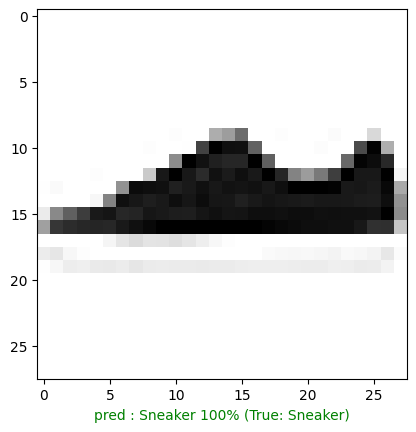

In [42]:
# check out the random image as well as its prediction
plot_random_image(model=model_4,
                  images=test_data_norm, # always make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning

In [44]:
# Find the layers of our most recent model
model_4.layers

In [45]:
# Exatract a particular layer
model_4.layers[1]

In [46]:
# Get the patterns of a layers in our network
weights, biases = model_4.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.09056206, -0.37858653, -0.25278866,  0.58495104],
        [ 0.10515676, -0.4003923 ,  0.14902836,  0.9516941 ],
        [ 1.1180055 , -0.9978199 , -0.7985268 ,  1.0116365 ],
        ...,
        [-0.324779  ,  0.07251211,  0.46510446,  0.19005617],
        [-0.4323739 ,  0.26685986,  0.20549054,  0.22828469],
        [-0.15641461, -0.03979331, -0.17113933,  0.4324519 ]],
       dtype=float32),
 (784, 4))

In [47]:
## Now let's check out the bias vector
biases, biases.shape

(array([0.34228593, 2.92257   , 0.7594331 , 0.05302415], dtype=float32), (4,))

Every neuron has a bias vector, Each of these is paired witha weights matrix. the bias vector get initialized as zeros(at least in the case of Tensorflow Dense layer).
the bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [48]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


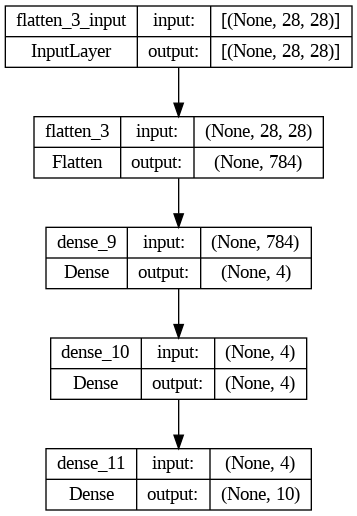

In [51]:
# Lets check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# see the inputs and outputs of each layer
plot_model(model_4,show_shapes=True)